In [572]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [573]:
housing=pd.read_excel('housing.xlsx')

In [574]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [575]:
housing.columns
#you can see there is white spaces in the column names

Index(['CRIM    ', 'ZN      ', 'INDUS   ', 'CHAS    ', 'NOX     ', 'RM      ',
       'AGE     ', 'DIS     ', 'RAD     ', ' TAX    ', ' PTRATIO', ' B      ',
       ' LSTAT  ', ' MEDV   '],
      dtype='object')

In [576]:
housing.info()
#you can see here too(colums after 8th RAD are indented)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        499 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9    TAX      506 non-null    int64  
 10   PTRATIO  506 non-null    float64
 11   B        506 non-null    float64
 12   LSTAT    506 non-null    float64
 13   MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [577]:
for i in housing.columns:
    print(len(i))
#names with different length but have the fixed string lenght here

8
8
8
8
8
8
8
8
8
8
8
8
8
8


In [578]:
dict={}
for i,j in zip(housing.columns,housing.columns.str.strip()):
    dict[i]=j
dict
#str.strip() is a method of df that removes white space from left & right of string(Not n between)

{'CRIM    ': 'CRIM',
 'ZN      ': 'ZN',
 'INDUS   ': 'INDUS',
 'CHAS    ': 'CHAS',
 'NOX     ': 'NOX',
 'RM      ': 'RM',
 'AGE     ': 'AGE',
 'DIS     ': 'DIS',
 'RAD     ': 'RAD',
 ' TAX    ': 'TAX',
 ' PTRATIO': 'PTRATIO',
 ' B      ': 'B',
 ' LSTAT  ': 'LSTAT',
 ' MEDV   ': 'MEDV'}

In [579]:
housing=housing.rename(columns=dict)

In [580]:
for i in housing.columns:
    print(len(i))
#now it's of different length

4
2
5
4
3
2
3
3
3
3
7
1
5
4


In [581]:
housing.columns
#now white space free

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [582]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [583]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       499 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [584]:
housing.value_counts('CHAS')
#we're checking it to see if it's biased(as it's the only CATEGORIZED data)

CHAS
0    471
1     35
Name: count, dtype: int64

In [585]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,499.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284581,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.701757,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.627000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

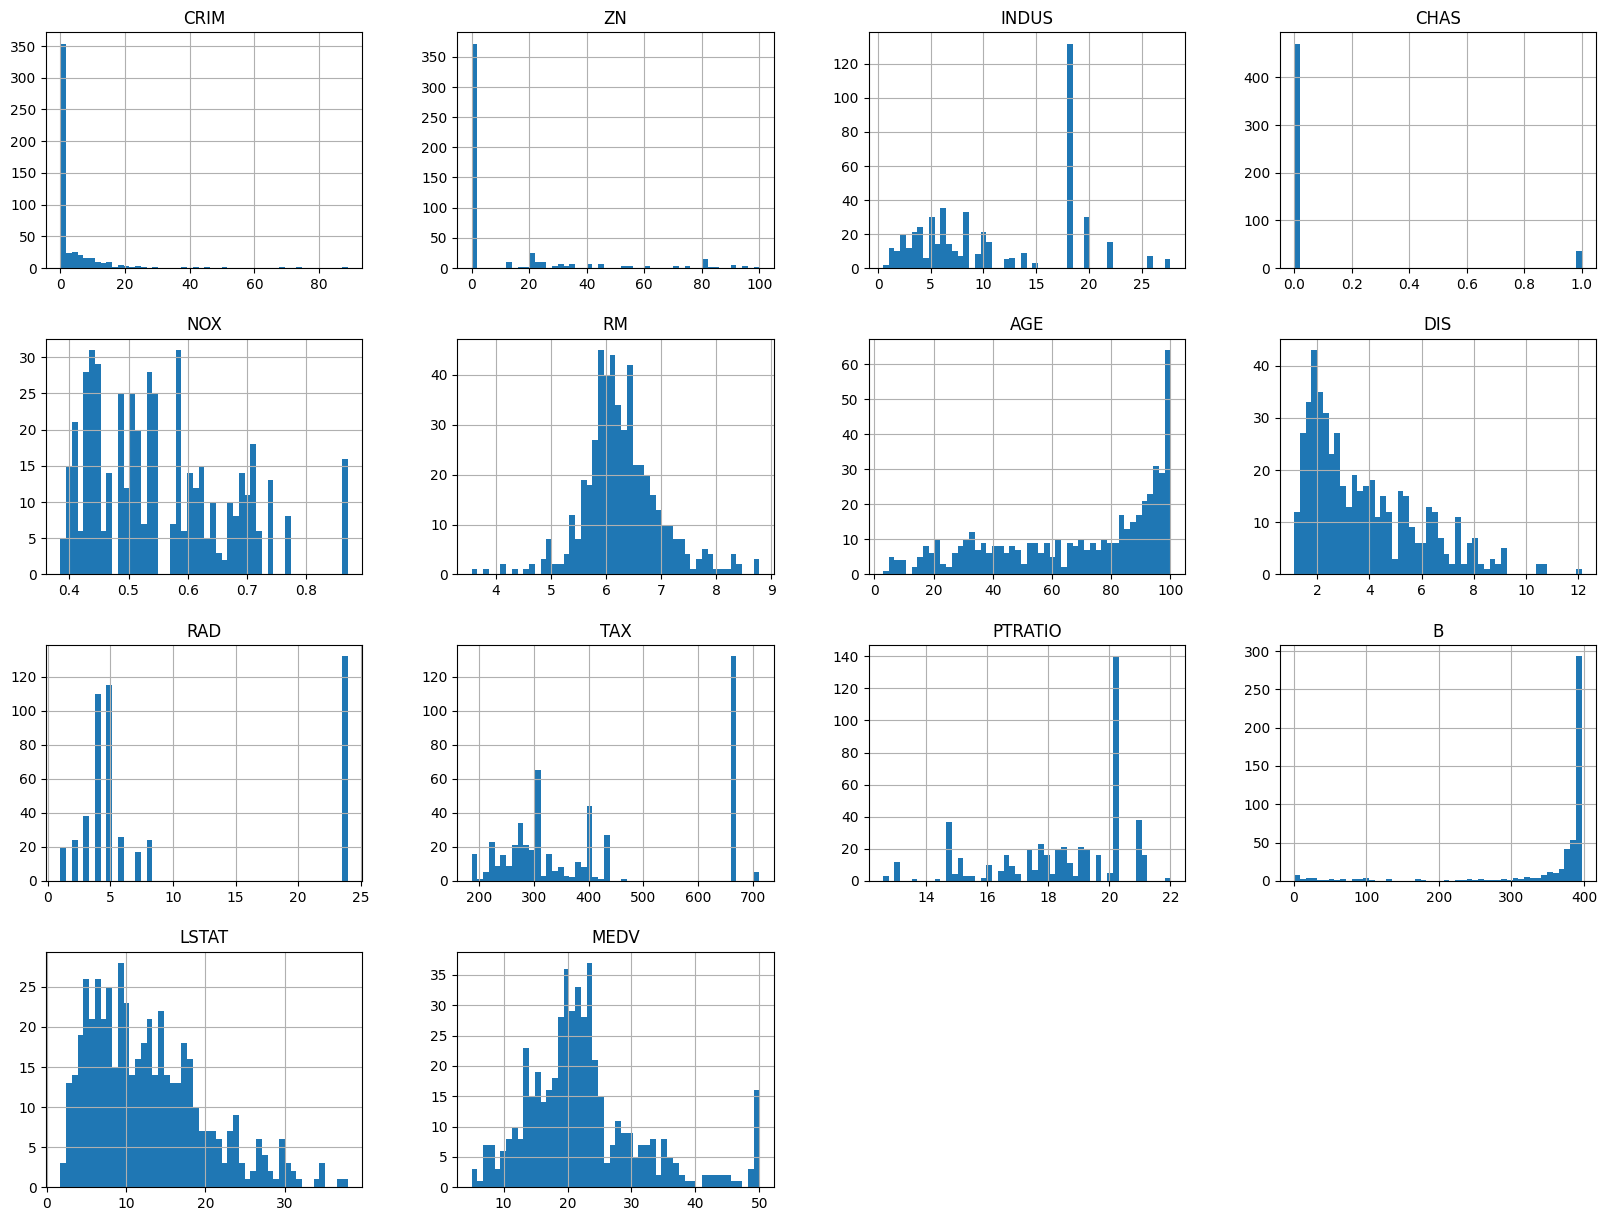

In [586]:
housing.hist(bins=50,figsize=(20,15)) 
#figsize is the dimension in inched of the output graph(as a whole not individual graph)
#(20,15) is the best size as i experienced on my laptop

In [587]:
np.random.seed(42)
np.random.permutation(len(housing))
#shuffles/generates random permuation of range of numbers : 0 to 506-1
#this will shuffle the row indices of the datagrame housing
#so when we split it then, it will take the random as indices are shuffled

array([173, 274, 491,  72, 452,  76, 316, 140, 471, 500, 218,   9, 414,
        78, 323, 473, 124, 388, 195, 448, 271, 278,  30, 501, 421, 474,
        79, 454, 210, 497, 172, 320, 375, 362, 467, 153,   2, 336, 208,
        73, 496, 307, 204,  68,  90, 390,  33,  70, 470,   0,  11, 281,
        22, 101, 268, 485, 442, 290,  84, 245,  63,  55, 229,  18, 351,
       209, 395,  82,  39, 456,  46, 481, 444, 355,  77, 398, 104, 203,
       381, 489,  69, 408, 255, 392, 312, 234, 460, 324,  93, 137, 176,
       417, 131, 346, 365, 132, 371, 412, 436, 411,  86,  75, 477,  15,
       332, 423,  19, 325, 335,  56, 437, 409, 334, 181, 227, 434, 180,
        25, 493, 238, 244, 250, 418, 117,  42, 322, 347, 182, 155, 280,
       126, 329,  31, 113, 148, 432, 338,  57, 194,  24,  17, 298,  66,
       211, 404,  94, 154, 441,  23, 225, 433, 447,   5, 116,  45,  16,
       468, 360,   3, 405, 185,  60, 110, 321, 265,  29, 262, 478,  26,
         7, 492, 108,  37, 157, 472, 118, 114, 175, 192, 272, 14

In [588]:
np.random.permutation(len(housing))
#you see seed() works only within the cell(above cell see() is not doing anything

array([309, 139, 499, 498,  88, 398, 304, 107,  59, 188, 168, 136,  70,
        96, 337, 260, 206, 318,  76, 342, 197, 334, 123, 321, 187, 355,
       399, 374, 470, 303, 233, 312, 115, 127, 152, 261, 381, 242, 156,
       430, 439,  23,  30, 129,  10, 361, 268, 213, 423, 317, 138, 134,
       158, 484, 448, 414, 124, 218, 243, 298, 247, 314, 480, 280, 485,
        39, 290, 245, 479,  66, 266,  67, 446, 422, 149, 175, 502, 287,
       450, 207, 363, 217,  63,  14, 183,  17, 344, 308, 362, 235, 253,
       405, 221,   1,  87, 126,  86, 357, 157, 299, 262, 319, 119, 174,
       307, 496, 244, 358, 432, 370, 170, 454,  47, 504, 106,  93,  55,
       154, 254, 198, 120,  25,  72, 270,  44, 130, 259,  48, 249, 494,
       286, 199, 391, 348,  21, 215, 210, 458,  20, 171, 288,  60, 457,
       431, 388, 325, 103, 359, 289, 294, 203, 209, 310, 421, 110, 453,
       472, 327, 230, 265, 275, 451, 413,  16, 365, 194, 137, 343, 353,
       295,  80, 240, 105, 179, 408, 184, 404, 460,  78,  29, 26

In [589]:
506 in np.random.permutation(len(housing))

False

In [590]:
505 in np.random.permutation(len(housing))

True

In [591]:
def splitData(data,test_ratio): #test ratio is the ratio train data size : test data size
    np.random.seed(42) #42 is the parampara
    shuffled_indices=np.random.permutation(len(data))
    test_size=int(len(data)*test_ratio)
    train_indices=shuffled_indices[test_size:]
    test_indices=shuffled_indices[:test_size]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set,test_set=splitData(housing,0.2)
print(f'rows in train_set: {len(train_set)}\nrows in test_set: {len(test_set)}')

rows in train_set: 405
rows in test_set: 101


## we can also use the same split function from the sklearn : train_test_split()


In [592]:
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f'rows in train_set: {len(train_set)}\nrows in test_set: {len(test_set)}')
#random_state=seed=42
#you see it's giving priority to reserve 20 or 20+ percent of the data for testing)

rows in train_set: 404
rows in test_set: 102


In [593]:
s=506*(20/100)
s

101.2

In [594]:
np.ceil(s)

102.0

## categorical data can be mislead ML if split with bias e.g. 'CHAS'
- Stratified shuffle is a technique used to ensure that each subset of data (e.g., training and testing sets) maintains the same distribution of a specific variable (typically a class label/categorized data) as the original dataset.
- when working with imbalanced datasets(as you can see CHAS distribution is imbalanced btw 0 & 1), where some classes are significantly more prevalent than others.
- it ensures that each class is appropriately represented in both training and testing sets.

In [595]:
housing.value_counts('CHAS')
# see how most of the values are 1

CHAS
0    471
1     35
Name: count, dtype: int64

In [596]:
471/35
# pehle se hi 13 times hai, agar galat split ho gaya random module se to aur bhi  ratio bigad jayega
#e.g. in tain_set 1 is 30 times than 0 then it will mislead ML

13.457142857142857

In [597]:
train_set.value_counts('CHAS')

CHAS
0    375
1     29
Name: count, dtype: int64

In [598]:
test_set.value_counts('CHAS')

CHAS
0    96
1     6
Name: count, dtype: int64

In [599]:
print(375/29)
print(96/6)
#dekha ratio bigad rha hai aur ye model ko mislead kr dega
#taining me raio(12) & test me 16 par original hai 13
#kaise chalega
#bole to this minority values ko barabar batana padega in train-test split

12.931034482758621
16.0


In [600]:
stratified_shuffled_splitIndices_Object=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
type(stratified_shuffled_splitIndices_Object)
#returns 2 array : array of train indices & ar. of test indices
#split 3 times/re-shuffle 3 times
#we can also give train_size in place of tes_size or both

sklearn.model_selection._split.StratifiedShuffleSplit

In [601]:
train_indices=[]
test_indices=[]
k=0
for i, j in stratified_shuffled_splitIndices_Object.split(housing,housing['CHAS']):
    tain_indices.append(i)
    test_indices.append(j)
    print(f"iteration: {k}")
    k+=1

iteration: 0


In [602]:
list(stratified_shuffled_splitIndices_Object.split(housing,housing['CHAS']))
#you see the object.splt is like a zip OBJECT
#similar to zip(train_indices_array, test_indices array)
#can't assign it directly like (a,b)=object
#instead access (elements tuple) wise using FOR LOOP

[(array([254, 348, 476, 321, 326, 411, 250, 100, 429,  57, 413, 115, 490,
         199, 494, 142, 113, 468, 400, 247, 151, 408,  68, 365,  81,  93,
         456, 116,  27, 234, 140,  47, 382, 377, 366, 185,  73, 267, 231,
         118,  96,  40, 182, 417, 492, 373, 294, 482,  62, 414, 289,  72,
         314,  89, 129, 157, 110, 343, 200, 310, 462, 361,  95,  37, 145,
         227, 166,  23,  85, 281, 285, 264, 501, 440, 241, 473,   0, 488,
         452, 323, 252, 416, 119,  60, 251, 409, 191,  42, 188, 412,  92,
         353, 292, 107,  12,   3, 364, 339, 301, 467, 376, 280, 309, 202,
          61,  24, 122, 164, 278, 139,  10, 415, 390, 338, 445, 486, 156,
         179, 159,  22, 318, 404, 425,  45,  74, 147, 431, 215, 434,  44,
          83, 144, 500, 406, 161, 331, 243, 293,  86, 162, 458, 359, 295,
         124, 341, 244, 319, 337,  15, 384, 248, 441, 258,  31, 481, 450,
         316,  66,  56, 211, 184, 325,  41,  11, 262, 491, 177, 369, 249,
         238, 125,   5, 224, 235, 334,

In [603]:
housing.iloc[[1,2,3]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


In [604]:
train_indices=[i for i, j in stratified_shuffled_splitIndices_Object.split(housing,housing['CHAS'])]
test_indices=[j for i, j in stratified_shuffled_splitIndices_Object.split(housing,housing['CHAS'])]
print(test_indices,type(test_indices),sep='\n')

[array([342, 379, 223, 219,  48, 134,  49, 448, 197, 273, 495, 374, 360,
       407, 336, 383, 284,  34, 320, 221, 130, 106, 380, 176, 102, 290,
       451, 275, 385, 198, 286, 487, 173, 378, 168, 394, 261,  43, 333,
       256, 213, 263, 357,  53, 105, 303, 232, 340, 465, 355, 498,  20,
       297, 356, 296, 237, 225, 194,  54,  13, 195, 401, 346, 181, 478,
        99, 167, 470, 150, 291, 160,  91, 230, 330, 196, 489, 153, 255,
       335, 322,  87, 505, 424,   1,  50, 480, 420,  71, 502,  58,  21,
        80, 398, 272, 422, 300, 493,  88, 466,  52, 121, 218], dtype=int64)]
<class 'list'>


In [605]:
a=np.array([1,2,3])
l=[i for i in a]
print(a,l,sep='\n')

[1 2 3]
[1, 2, 3]


In [606]:
for i,j in stratified_shuffled_splitIndices_Object.split(housing,housing['CHAS']):
    train_indices=i
    test_indices=j
print(test_indices,type(test_indices))

[342 379 223 219  48 134  49 448 197 273 495 374 360 407 336 383 284  34
 320 221 130 106 380 176 102 290 451 275 385 198 286 487 173 378 168 394
 261  43 333 256 213 263 357  53 105 303 232 340 465 355 498  20 297 356
 296 237 225 194  54  13 195 401 346 181 478  99 167 470 150 291 160  91
 230 330 196 489 153 255 335 322  87 505 424   1  50 480 420  71 502  58
  21  80 398 272 422 300 493  88 466  52 121 218] <class 'numpy.ndarray'>


In [607]:
list_test_indices=[i for i in test_indices]
housing.iloc[list_test_indices]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [608]:
housing.iloc[list_test_indices].value_counts('CHAS')

CHAS
0    95
1     7
Name: count, dtype: int64

In [609]:
list_train_indices=[i for i in train_indices]
housing.iloc[list_train_indices].value_counts('CHAS')

CHAS
0    376
1     28
Name: count, dtype: int64

In [610]:
95/7

13.571428571428571

In [611]:
376/28

13.428571428571429

In [612]:
housing.value_counts('CHAS')

CHAS
0    471
1     35
Name: count, dtype: int64

In [613]:
471/35

13.457142857142857

### now you can see that ratio of 13:1 is maintained

In [614]:
train_set=housing.iloc[list_train_indices]
test_set=housing.iloc[list_test_indices]

In [615]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       397 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [616]:
train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,397.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279758,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712099,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.880000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


# yaad rakh sirf train_set me hi dekhna hai kuchh bhi
- to housing=train_set kr de aur same code rehne de

In [617]:
housing=train_set

# correlation

In [618]:
corr=housing.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.212927,0.416640,-0.061482,0.430879,-0.259662,0.361890,-0.386900,0.648221,0.603934,0.305603,-0.486869,0.471442,-0.393715
ZN,-0.212927,1.000000,-0.542161,-0.023536,-0.509327,0.296321,-0.565680,0.666939,-0.306480,-0.322803,-0.390570,0.188575,-0.420097,0.339741
INDUS,0.416640,-0.542161,1.000000,0.043686,0.759051,-0.379594,0.644114,-0.708612,0.580908,0.716288,0.384465,-0.368685,0.611068,-0.473516
CHAS,-0.061482,-0.023536,0.043686,1.000000,0.077490,0.101213,0.058388,-0.088081,-0.023005,-0.048802,-0.132682,0.048275,-0.077592,0.205066
NOX,0.430879,-0.509327,0.759051,0.077490,1.000000,-0.299482,0.727358,-0.763623,0.596012,0.659049,0.164977,-0.408434,0.602386,-0.422873
RM,-0.259662,0.296321,-0.379594,0.101213,-0.299482,1.000000,-0.245635,0.207907,-0.204364,-0.282233,-0.328901,0.122694,-0.598954,0.676270
AGE,0.361890,-0.565680,0.644114,0.058388,0.727358,-0.245635,1.000000,-0.734827,0.449489,0.501491,0.259633,-0.287900,0.599211,-0.364596
DIS,-0.386900,0.666939,-0.708612,-0.088081,-0.763623,0.207907,-0.734827,1.000000,-0.481556,-0.530840,-0.215173,0.309222,-0.501408,0.240451
RAD,0.648221,-0.306480,0.580908,-0.023005,0.596012,-0.204364,0.449489,-0.481556,1.000000,0.910932,0.471912,-0.490951,0.479857,-0.374693
TAX,0.603934,-0.322803,0.716288,-0.048802,0.659049,-0.282233,0.501491,-0.530840,0.910932,1.000000,0.473026,-0.475293,0.534228,-0.456657


In [619]:
# check how different vars affecting MEDV
corr.loc[:,['MEDV']].sort_values('MEDV',ascending=False)

,MEDV
MEDV,1.000000
RM,0.676270
B,0.361761
ZN,0.339741
DIS,0.240451
CHAS,0.205066
AGE,-0.364596
RAD,-0.374693
CRIM,-0.393715
NOX,-0.422873


In [620]:
focus=['MEDV','RM','ZN','CHAS','LSTAT'] 
#either most +ve or most -ve
#plot 5x5 =25 graphs
#it will not look scatter but histogram in btw 2 same attributes

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='CHAS', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='CHAS', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='CHAS', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='CHAS'>,
        <Axes: xlabel='RM', ylabel='CHAS'>,
        <Axes: xlabel='ZN', ylabel='CHAS'>,
        <Axes: xlabel='CHAS', ylabel='CHAS'>,
        <Axes: xlabel='LSTAT', ylabel='CHAS'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: x

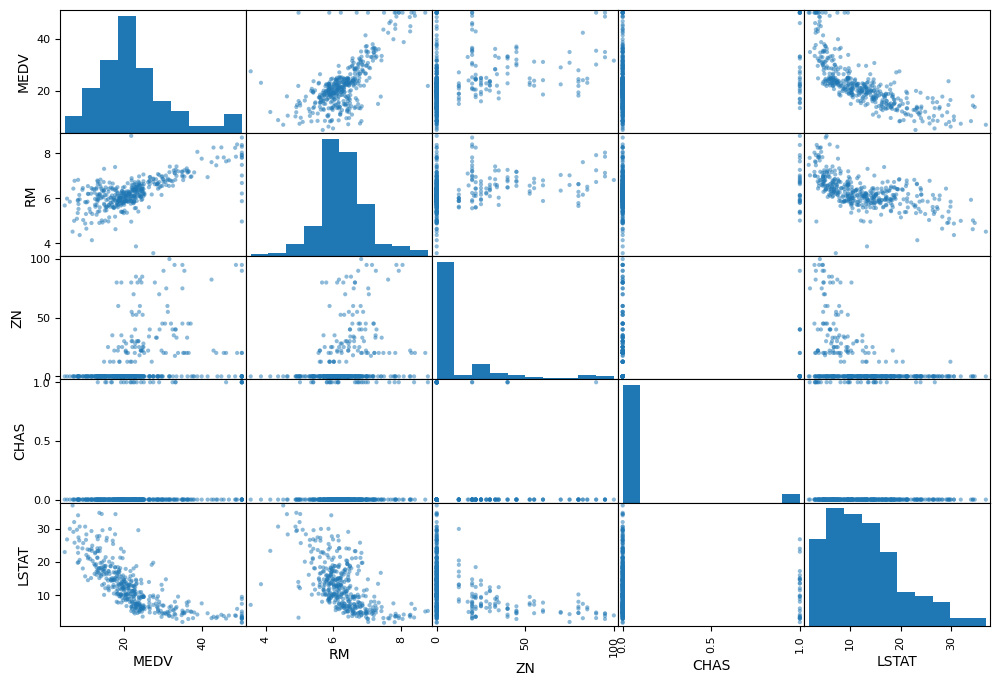

In [621]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[focus],figsize=(12,8))
#idk why i need to import a module from the library when i've allready imported the whole library

# why not a straght line but a histogram in case of scatter plot btw 2 same attributes
- because histogram will give a better insight about the plot btw same plot
- we already know it would be a st. line but with histogram we can get the idea of distribution of values among the population(i.e. what value lies in what range)

# since our target var is MEDV
- we see RM vs MEDV , LSTAT vs MEDV interseting

<Axes: xlabel='RM', ylabel='MEDV'>

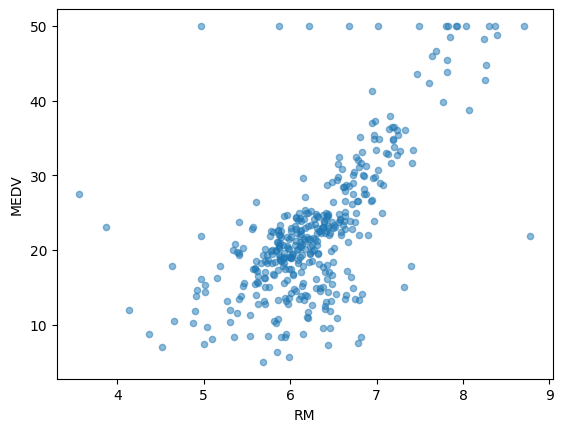

In [622]:
housing.plot(kind='scatter',x='RM',y='MEDV',alpha=0.5)
#alpha helps in visualizing overlapping points(tells if more dense or not)

Text(0, 0.5, 'MEDV : median value of home[in 1000s $]')

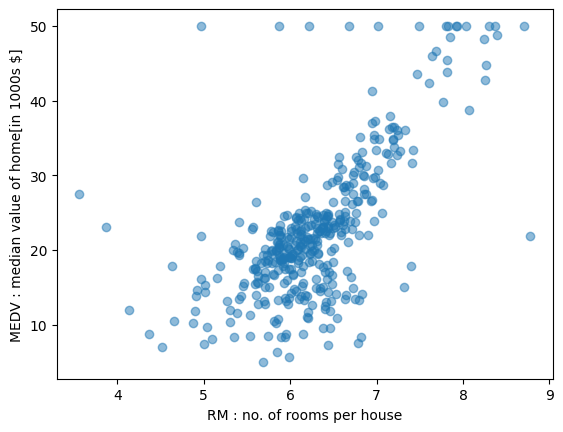

In [623]:
plt.scatter(x=housing['RM'],y=housing['MEDV'], alpha=0.5)
#abouve will not have labels, have to put manually
#but it give me customizability to write something else
#like RM ki jagah : rooms per house
plt.xlabel("RM : no. of rooms per house")
plt.ylabel("MEDV : median value of home[in 1000s $]")

# explore new/custom attributes
` TPR=TAX/RM` : tax per room

In [624]:
housing['TPR']=housing['TAX']/housing['RM']
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TPR
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6,65.507152
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4,109.126659
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8,35.294118
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1,102.068966


In [625]:
corr=housing.corr()
corr[['MEDV']].sort_values('MEDV',ascending=False)

,MEDV
MEDV,1.000000
RM,0.676270
B,0.361761
ZN,0.339741
DIS,0.240451
CHAS,0.205066
AGE,-0.364596
RAD,-0.374693
CRIM,-0.393715
NOX,-0.422873


### ⬆️
- you see TPR is strongly correlated with MEDV(even better that TAX & PTRATIO)
- so lets include TPR in EDA

In [626]:
l=['MEDV','RM','ZN','CHAS','LSTAT']
l1=focus.append('TPR')  
print(new_focus)
#this is wrong #append will change in the original list & nothing(None) will come in new list
# use concatenation(list addition operation) or use the original list

['MEDV', 'RM', 'ZN', 'CHAS', 'TPR', 'LSTAT']


In [627]:
print("helllo")

helllo


In [628]:
l=[1,2,3]
l1=l
l1

[1, 2, 3]

In [629]:
l1.append("hello")
print(l,l1,sep='\n')
#you see dono me append hua
#bachke bhai  appned is very dangerous specially with notebook,with every append it will change

[1, 2, 3, 'hello']
[1, 2, 3, 'hello']


In [630]:
new_focus=focus+["TPR"]
#it will add TPR to the end  but i need it on second last(do it manually)
new_focus=['MEDV','RM','ZN','CHAS','TPR','LSTAT'] 

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='CHAS', ylabel='MEDV'>,
        <Axes: xlabel='TPR', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='CHAS', ylabel='RM'>,
        <Axes: xlabel='TPR', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='CHAS', ylabel='ZN'>,
        <Axes: xlabel='TPR', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='CHAS'>,
        <Axes: xlabel='RM', ylabel='CHAS'>,
        <Axes: xlabel='ZN', ylabel='CHAS'>,
        <Axes: xlabel='CHAS', ylabel='CHAS'>,
        <Axes: xlabel='TP

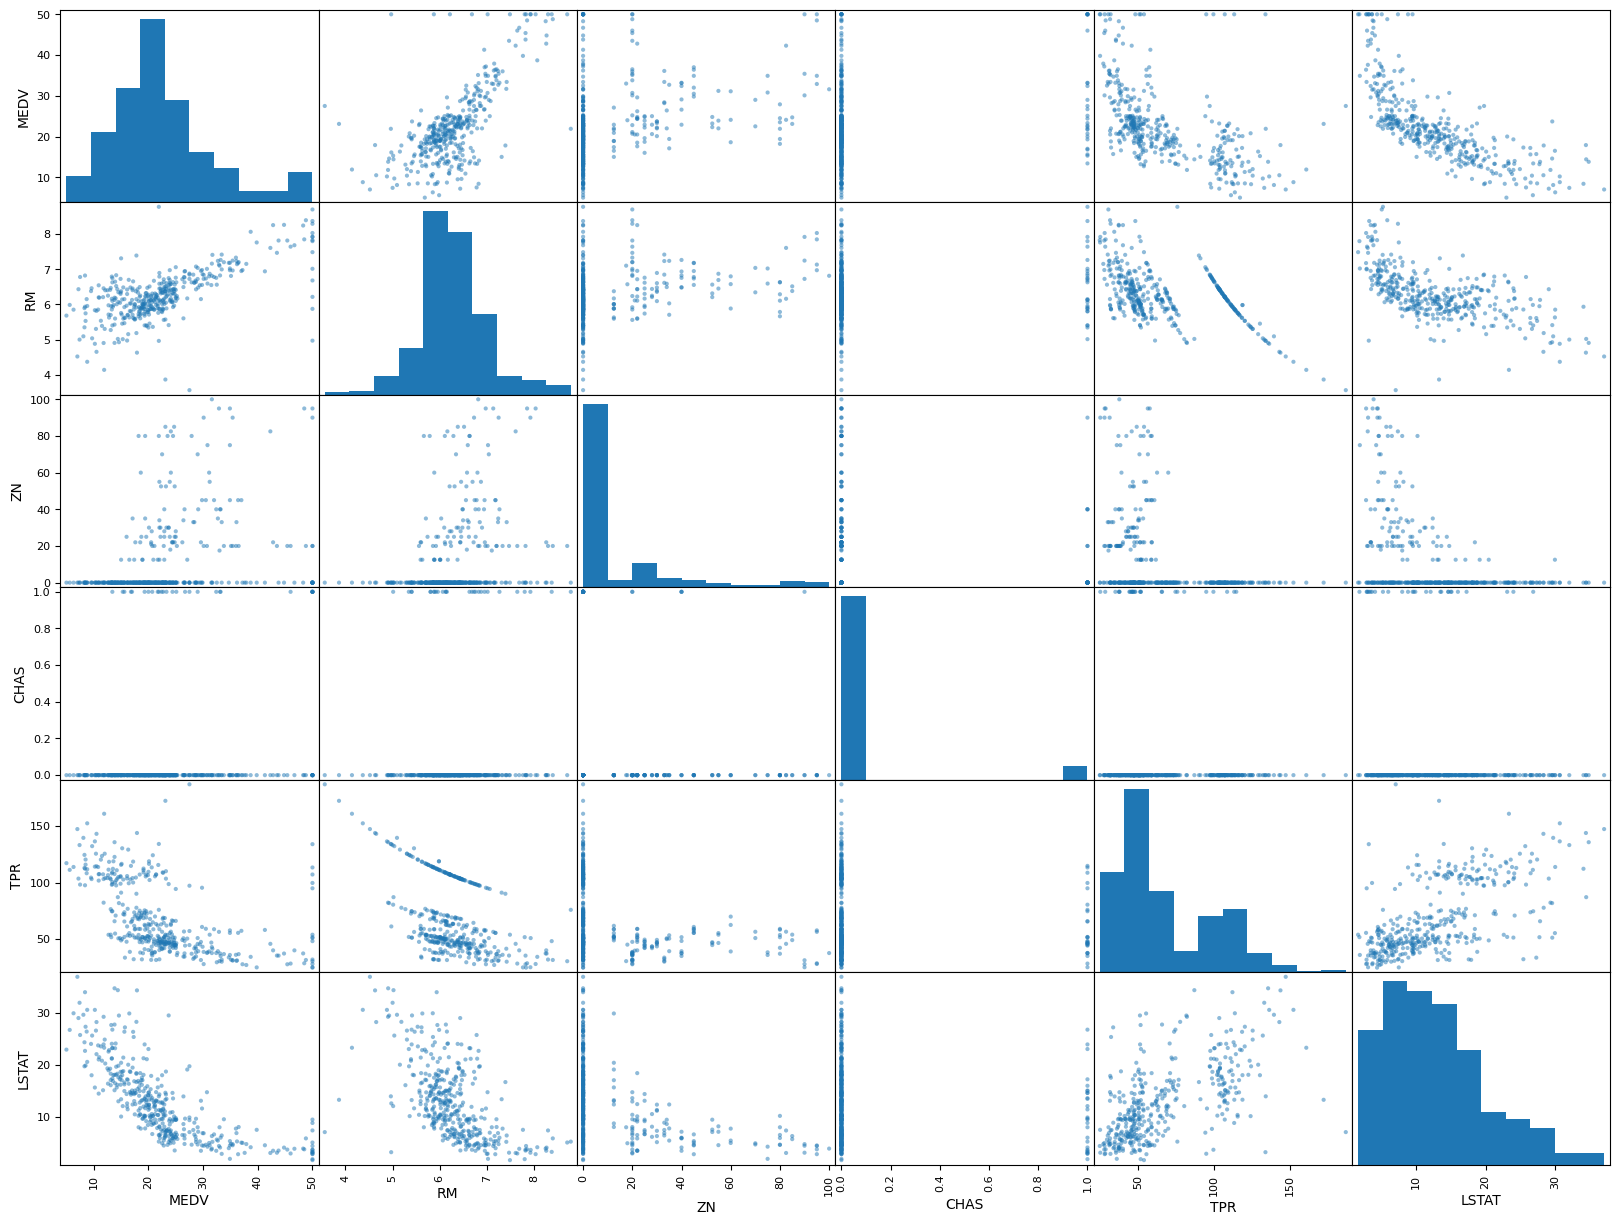

In [631]:
scatter_matrix(housing[new_focus],figsize=(20,15))

# missing data points handling
- remove all the missinng data rows(don't do when already very less datapoints say 506 in this case, if missing cells are random then it can remove the size of data by high amount
- remove the column entirly(don't do when column is important
- `fill with 0, mean, median or any suitable value` : allways prefer this : use IMPUTE MODULE

# scientific notation using string formatting
`f"{value:.2e}"`

In [632]:

f"{housing.AGE.median():.2e}"

'7.82e+01'

In [633]:
s = pd.Series([1234567890, 987654321, 0.00001234, 0.00005678])

# Convert numbers to scientific notation
s_scientific = s.apply(lambda x: f"{x:.2e}")

print(s_scientific)

0    1.23e+09
1    9.88e+08
2    1.23e-05
3    5.68e-05
dtype: object


In [634]:
# upto 1:55

# save this file
# commit upto this & change the branch(from br1 to br2)
# we first drop some random cell  values in excel from 'RM' & save file & re-run all the cells

In [635]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TPR
count,404.000000,404.000000,404.000000,404.000000,404.000000,397.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,397.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279758,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.654122
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712099,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.665899
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.880000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,44.783385
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,54.027505
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.681286
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


In [636]:
#remeber what we do as method of dataframe does not change the origna datafram
#it just return a copy

#option 1 : remove the row having missing value
a=housing.dropna(axis=0,how='any')
a
#axis=0 : row drop kro
#how ="any" : agar 1 bhi value(any) missing hai us row me

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TPR
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6,65.507152
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4,109.126659
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8,35.294118
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1,102.068966


In [637]:
a.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TPR
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,3.654476,10.972292,11.336826,0.070529,0.558642,6.279758,69.068766,3.740158,9.813602,413.342569,18.463728,352.972443,12.814131,22.522166,67.654122
std,8.160995,22.298237,6.891166,0.256359,0.117461,0.712099,28.171396,2.105101,8.785635,169.849632,2.126669,96.750409,7.253682,9.415824,31.665899
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086640,0.000000,5.190000,0.000000,0.453000,5.880000,45.000000,2.021800,4.000000,284.000000,17.400000,374.430000,6.900000,16.600000,44.783385
50%,0.279570,0.000000,9.900000,0.000000,0.538000,6.211000,78.100000,3.102500,5.000000,337.000000,19.000000,390.960000,11.500000,21.100000,54.027505
75%,4.038410,12.500000,18.100000,0.000000,0.631000,6.631000,94.000000,5.100400,24.000000,666.000000,20.200000,395.630000,17.100000,25.000000,98.681286
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


In [638]:
a.shape

(397, 15)

In [639]:
#option 2
b=housing.dropna(axis=1,how="any")
b

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [640]:
b.describe()

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [641]:
b.shape

(404, 13)

# drop that jhanjhat TPR yaar so that i can work on only on RM manually

In [642]:
housing.drop(axis=1,columns=["TPR"],inplace=True) 
#inplace mtlb original se hi delete kr do

In [644]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [646]:
#option 3
#we need to fill column missing value (RM) with their median
mRM=housing["RM"].median()
print(mRM)

6.211


In [649]:
housing.RM.describe()

count    397.000000
mean       6.279758
std        0.712099
min        3.561000
25%        5.880000
50%        6.211000
75%        6.631000
max        8.780000
Name: RM, dtype: float64

In [650]:
housing["RM"].fillna(mRM).describe()
#fills missing value with mRM(median of RM column)

count    404.000000
mean       6.278567
std        0.705945
min        3.561000
25%        5.884750
50%        6.211000
75%        6.630000
max        8.780000
Name: RM, dtype: float64

# SimpleImputer  : better way to than (calculating median + fillna)
- literal meaning of impute : assign a value to something
- here impute_meadian will be the medians of all the columns & will have a method .fit() calculate median of all the columns & store them withing the object again & return itself(return self=fitted estimator)
- then using .transform() method that will fill the dataframe/array at missing values & return an array
- to make it a dataframe, we need to convert the array to dataframe
- or i can directly use fit_transform equivalent to fit+transform
- it's amazing, official docs are easier than the yt tutorials(& most important : they are true & exact, no lies) : `https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html`
- in programmin, e stands for e-xponent 10

In [651]:
from sklearn.impute import SimpleImputer

In [652]:
imputer_object_median=SimpleImputer(strategy="median")
#by defualt : missing_value=np.nan
#imputer ka 1 object dedo jiska jo median pe kaam kre

In [678]:
imputer_object_median.fit(housing) #this return itself & need not to be assigned to use it

SimpleImputer(strategy='median')

In [679]:
imputer_object_median.statistics_
#isse statistical  values de dega shap/dataframe ke columns ki

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01, 2.11500e+01])

In [680]:
imputer_object_median.statistics_.shape
#isse statistical  values de dega shap/dataframe ke columns ki

(14,)

In [681]:
a=imputer_object_median.transform(housing)
a

array([[4.81900e-02, 8.00000e+01, 3.64000e+00, ..., 3.92890e+02,
        6.57000e+00, 2.19000e+01],
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 3.90940e+02,
        5.99000e+00, 2.45000e+01],
       [4.87141e+00, 0.00000e+00, 1.81000e+01, ..., 3.96210e+02,
        1.86800e+01, 1.67000e+01],
       ...,
       [8.18700e-02, 0.00000e+00, 2.89000e+00, ..., 3.93530e+02,
        3.57000e+00, 4.38000e+01],
       [4.75237e+00, 0.00000e+00, 1.81000e+01, ..., 5.09200e+01,
        1.81300e+01, 1.41000e+01],
       [4.56000e-02, 0.00000e+00, 1.38900e+01, ..., 3.92800e+02,
        1.35100e+01, 2.33000e+01]])

In [682]:
type(a)

numpy.ndarray

In [683]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [684]:
#new housing
housing_new=pd.DataFrame(data=a,columns=housing.columns)
housing_new

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
1,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99,24.5
2,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68,16.7
3,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87,23.1
4,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,3.53501,0.0,19.58,1.0,0.871,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02,15.6
400,7.05042,0.0,18.10,0.0,0.614,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,13.4
401,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57,43.8
402,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24.0,666.0,20.2,50.92,18.13,14.1


In [687]:
housing.describe()
#see 397 data points in RM

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,397.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279758,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712099,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.880000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [689]:
housing_new.describe()
#see 404 data points in RM
#i.e. missing values are filled by median of the column

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278567,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.705945,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.884750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


# feature scaling : scale different columns numerical value to same scale(say 4 RM for 100 MEDV we scale it to make same value say x)
- better to apply ML
- methods:
  - (value-min)/(max-min) : MinMaxScaler in Sklearn
  - (value-mean)/std : StandardScalar in sklearn

## standardization

In [700]:
zn=housing_new.loc[:,["ZN"]]
zn

,ZN
0,80.0
1,80.0
2,0.0
3,0.0
4,0.0
...,...
399,0.0
400,0.0
401,0.0
402,0.0


In [717]:
m=zn.mean()
m

ZN    10.836634
dtype: float64

In [704]:
s=zn.std()
s

ZN    22.150636
dtype: float64

In [720]:
zn.apply(lambda x :  (x-m)/s)
# this is wrong code : apply takes the zn it self in ambda argument
# - but performs element wise though

,ZN
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
400,NaN
401,NaN
402,NaN
403,NaN


In [723]:
new_zn=zn.apply(lambda zn : (zn-zn.mean())/zn.std())
new_zn
#bole to apply vectorized operation krta hai-
#-aur uska syntax bhi vectorized form me hai
#bole to not element wise but like matrix/array

,ZN
0,3.122410
1,3.122410
2,-0.489224
3,-0.489224
4,-0.489224
...,...
399,-0.489224
400,-0.489224
401,-0.489224
402,-0.489224


array([[<Axes: title={'center': 'ZN'}>]], dtype=object)

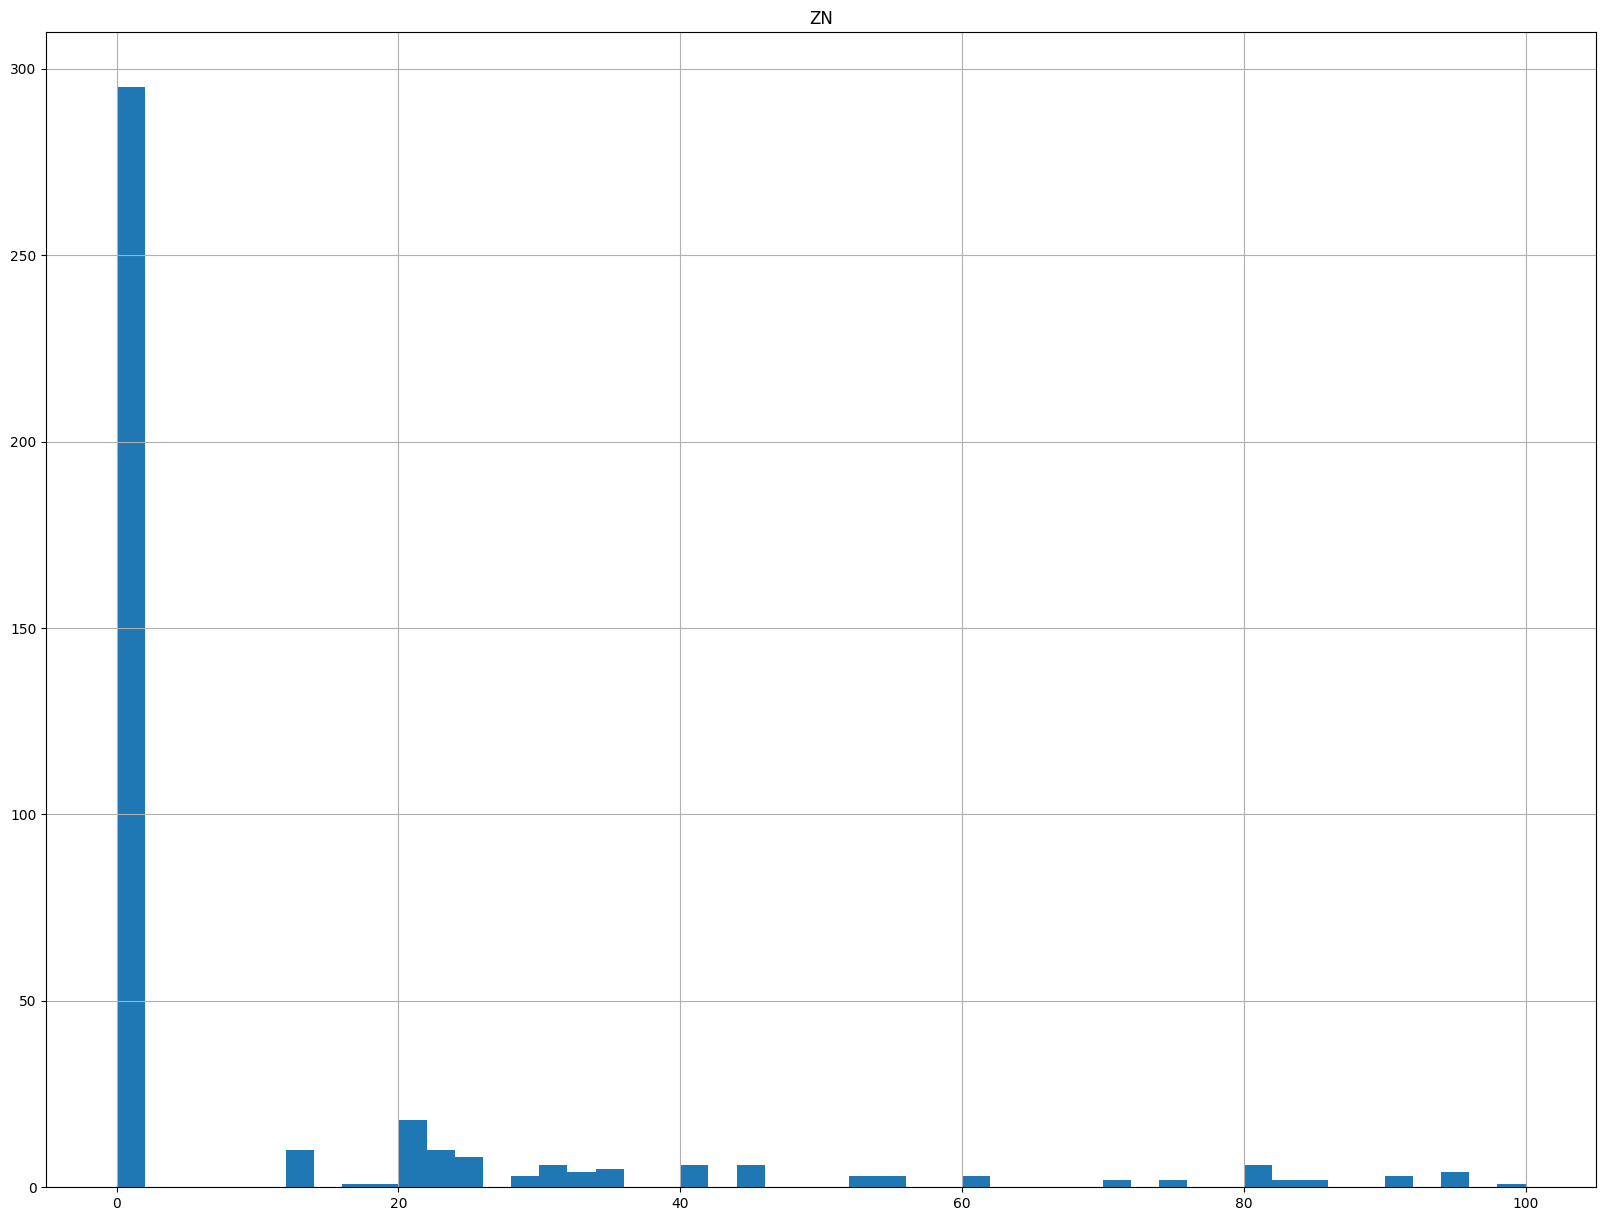

In [724]:
zn.hist(bins=50,figsize=(20,15)) 

array([[<Axes: title={'center': 'ZN'}>]], dtype=object)

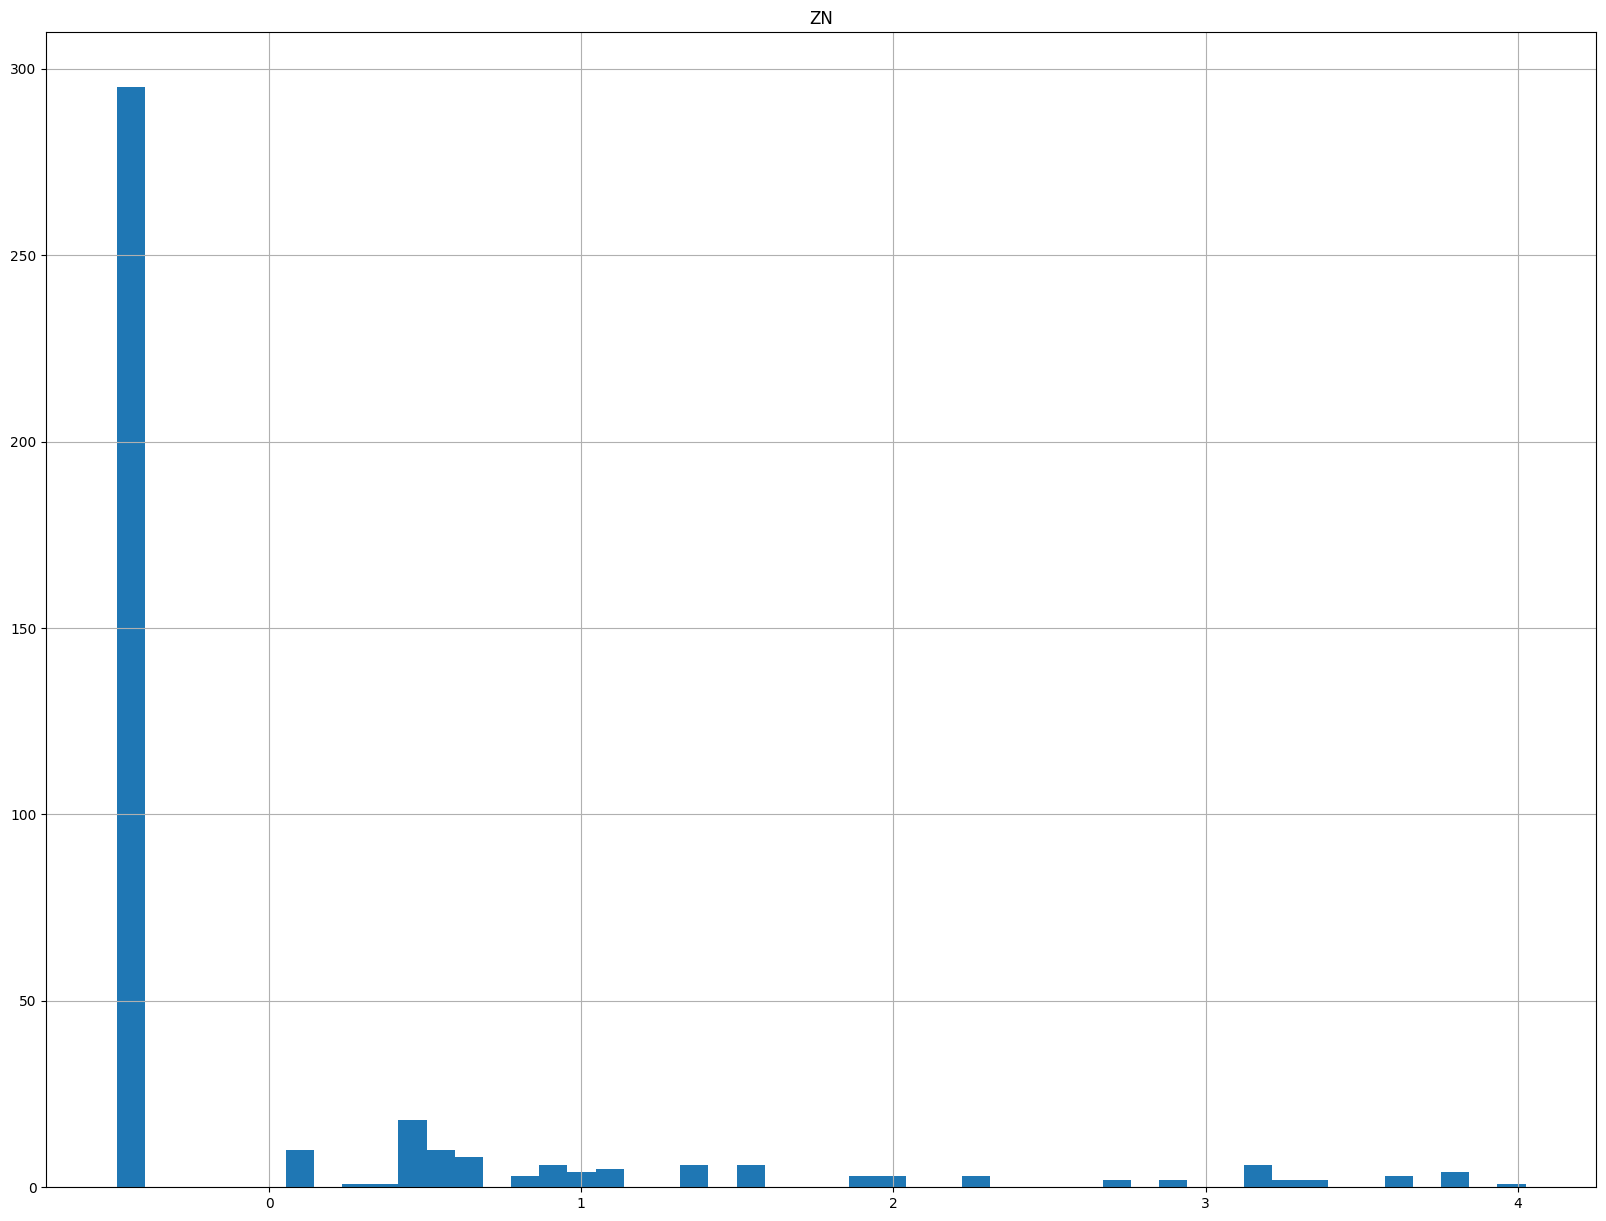

In [730]:
new_zn.hist(bins=50,figsize=(20,15)) 

# meaning : result of Normalization/scaling down
- distribution looks the same(histogram)(shape is same)(not like a normal distribution)
- only scales are downed
- mean=0
- variance =1=std

In [735]:
linear=[i for i in range(len(zn))]
linear[:5]

[0, 1, 2, 3, 4]

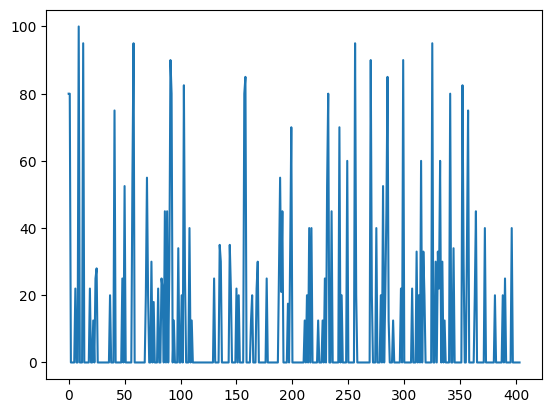

In [728]:
plt.plot(linear,zn)

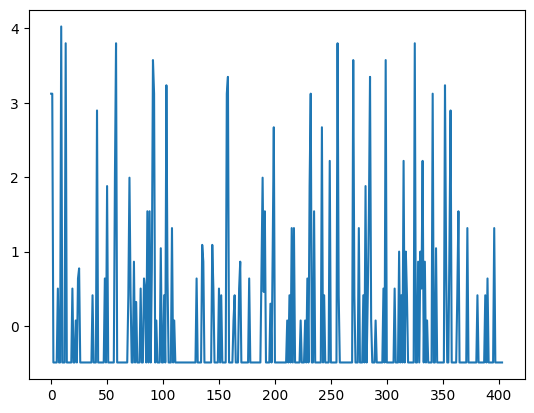

In [729]:
plt.plot(linear,new_zn)

In [739]:
print(zn.mean(),new_zn.mean(),sep="\n**************\n")
#4.396923e-18 = almost zero

ZN    10.836634
dtype: float64
**************
ZN    4.396923e-18
dtype: float64


In [736]:
print(zn.std(),new_zn.std(),sep="\n**************\n")

ZN    22.150636
dtype: float64
**************
ZN    1.0
dtype: float64


# sklearn has something for this

In [744]:
from sklearn.preprocessing import StandardScaler

In [795]:
standar_scalar_object=StandardScaler()
standar_scalar_object
#takes nothing as argument(i.e. all defaults are working here)

StandardScaler()

In [751]:
a=standar_scalar_object.fit_transform(housing_new)
a
#you can see i used fit_tranform instead of fit then trandform
#exacly same as SimpleImputer, it return array/shape of the data

array([[-0.43942006,  3.12628155, -1.12165014, ...,  0.41164221,
        -0.86091034, -0.06501087],
       [-0.44352175,  3.12628155, -1.35893781, ...,  0.39131918,
        -0.94116739,  0.21235476],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.44624347,
         0.81480158, -0.61974213],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ...,  0.41831233,
        -1.27603303,  2.27126115],
       [ 0.14210728, -0.4898311 ,  0.98336806, ..., -3.15239177,
         0.73869575, -0.89710776],
       [-0.43974024, -0.4898311 ,  0.37049623, ...,  0.41070422,
         0.09940681,  0.08433985]])

Text(0, 0.5, 'MEDV')

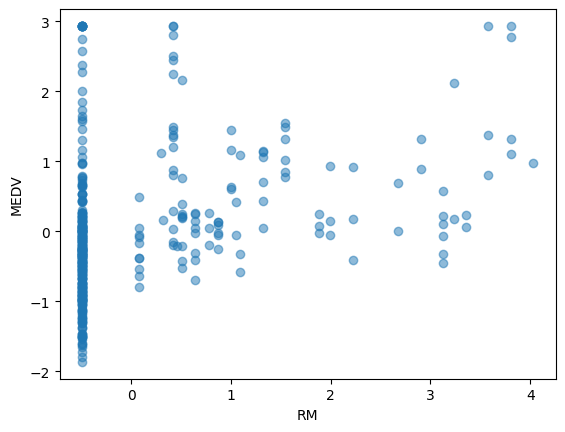

In [794]:
plt.scatter(x=a[:,1],y=a[:,13],alpha=0.5)
plt.xlabel('RM')
plt.ylabel('MEDV')
#this 1 is normailzed(AFTER SCALING)

In [777]:
print("RM",a[:,1].max(),a[:,1].min(),sep=" | ")

RM | 4.030309707019621 | -0.48983110036455235


In [778]:
print("MEDV",a[:,13].max(),a[:,13].min(),sep=" | ")

MEDV | 2.9326714994213408 | -1.8678874549897062


<Axes: xlabel='RM', ylabel='MEDV'>

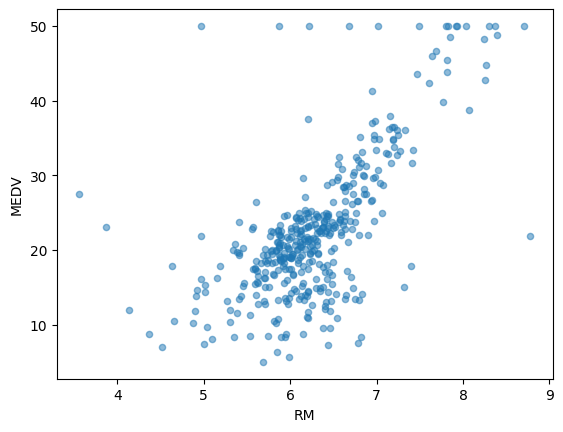

In [793]:
housing_new.plot(x='RM',y='MEDV',kind='scatter',alpha=0.5)
#PLOT WITHOUT SCALING

In [792]:
housing_new[["RM",'MEDV']].describe()

,RM,MEDV
count,404.000000,404.000000
mean,6.278567,22.509406
std,0.705945,9.385531
min,3.561000,5.000000
25%,5.884750,16.600000
50%,6.211000,21.150000
75%,6.630000,25.000000
max,8.780000,50.000000


# pipeline : 
- all could hav done within the pipline
- it automates & makes things look easy

In [743]:
from sklearn.pipeline import Pipeline
#pipeline helps in automating the work(takes list of -
#-preproccessings need on data e.g. imputation, standardization & many more
# data will go to the first item(pre-processor) then second & so on to give an array in the last

In [799]:
pipeline_object=Pipeline([
    ('object1_imputer', SimpleImputer(strategy='median')),
    ('object2_std_sclar',StandardScaler()),
    # & many more preprocessings...
    #object1_imputer is just a name to access it individually
])

In [822]:
housing_new2=pipeline_object.fit_transform(housing)
housing_new2
#now don't convert it to DF again as predictor take array not DF

array([[-0.43942006,  3.12628155, -1.12165014, ...,  0.41164221,
        -0.86091034, -0.06501087],
       [-0.44352175,  3.12628155, -1.35893781, ...,  0.39131918,
        -0.94116739,  0.21235476],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.44624347,
         0.81480158, -0.61974213],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ...,  0.41831233,
        -1.27603303,  2.27126115],
       [ 0.14210728, -0.4898311 ,  0.98336806, ..., -3.15239177,
         0.73869575, -0.89710776],
       [-0.43974024, -0.4898311 ,  0.37049623, ...,  0.41070422,
         0.09940681,  0.08433985]])

In [880]:
# converting the array into df for use later(not in fitting but other)
housing_imputed_normalized=pd.DataFrame(housing_new2,columns=housing.columns)
housing_imputed_normalized

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.439420,3.126282,-1.121650,-0.272888,-1.422627,-0.241915,-1.312388,2.611114,-1.001686,-0.577819,-0.974918,0.411642,-0.860910,-0.065011
1,-0.443522,3.126282,-1.358938,-0.272888,-1.054257,0.505528,-1.393881,2.193123,-0.657667,-0.785579,-0.692779,0.391319,-0.941167,0.212355
2,0.156823,-0.489831,0.983368,-0.272888,0.479194,0.291365,0.870210,-0.687307,1.635794,1.505715,0.811966,0.446243,0.814802,-0.619742
3,-0.422929,-0.489831,-0.577199,-0.272888,-0.557384,0.138189,-0.522259,0.378825,-0.542994,-0.744027,0.529827,0.453435,-0.819398,0.063004
4,-0.407863,-0.489831,-0.577199,-0.272888,-0.557384,0.047418,-1.422226,0.796434,-0.542994,-0.744027,0.529827,0.453435,-0.919028,0.052336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.008382,-0.489831,1.198819,3.664502,2.680852,-0.179509,0.480460,-0.954329,-0.542994,-0.055452,-1.774314,-2.765837,0.308352,-0.737089
400,0.426191,-0.489831,0.983368,-0.272888,0.479194,-0.249006,0.569040,-0.822535,1.635794,1.505715,0.811966,-3.656820,1.452707,-0.971783
401,-0.435257,-0.489831,-1.230832,-0.272888,-0.968589,2.186212,-1.138772,-0.119730,-0.887013,-0.809323,-0.222546,0.418312,-1.276033,2.271261
402,0.142107,-0.489831,0.983368,-0.272888,1.327303,0.349516,0.618644,-0.625059,1.635794,1.505715,0.811966,-3.152392,0.738696,-0.897108


# predictors : selecting models

In [823]:
housing_new2.shape

(404, 14)

In [821]:
housing.shape

(404, 14)

In [824]:
housing_new.shape

(404, 14)

In [827]:
# now we need 2 things(from the pipelined data(after imputation+normalizaton)
#1 features(other than target variables
#2 target variable

features=housing_new2[:,0:13] #will take upto 12 index=13 columns
features.shape

(404, 13)

In [829]:
target=housing_new2[:,13]
target.shape

(404,)

In [831]:
from sklearn.linear_model import LinearRegression

In [849]:
model_object=LinearRegression() #all arguments are default
model_object.fit(features,target)
#better name model instead of model_object

LinearRegression()

In [847]:
prediction=model_object.predict(features)
prediction.shape

(404,)

In [848]:
target.shape

(404,)

In [836]:
from sklearn.metrics import mean_squared_error

In [841]:
rmse=np.sqrt(mean_squared_error(prediction,target))
rmse

0.5167581004587384

In [842]:
normalized_rmse=rmse/(target.max()-target.min())**2
normalized_rmse

0.022423514310742253

In [844]:
f"{normalized_rmse:.2%}"
#percen upto 2 digits

'2.24%'

In [846]:
#so LinearRegression( is a good model with 2.24%(<5%) error

# let's try other models

In [850]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(features,target)
prediction=model.predict(features)

In [851]:
prediction.shape

(404,)

In [852]:
target.shape

(404,)

In [853]:
rmse=np.sqrt(mean_squared_error(prediction,target))
rmse

0.0

In [854]:
normalized_rmse=rmse/(target.max()-target.min())**2
normalized_rmse

0.0

In [855]:
f"{normalized_rmse:.2%}"

'0.00%'

In [856]:
#so DeDecisionTreeRegressor is not a good model with 0%(overfit) error

# cross-validation : it judges the model better by cross-validation
- like we worked on whole data(withing the train_set)
    - made model with features & caculated error with target(bole to same data pe train & same pe testing)
- now what we'll do is split thee train_set in k(say 10) equal parts
    - `CROSS-VALIDATION` : made model(fit data in model) with 9 parts feature but error but calculate error using other last 1 part features & target : rmse(prediction1,target1)
- then we'll get array of 10 rmse's(called SOCRES here) & we'll select see the final error as mean of the 10 rmse's

In [857]:
from sklearn.model_selection import cross_val_score

In [863]:
scores_dicisonTree=cross_val_score(model,features,target,scoring="neg_mean_squared_error",cv=10)
#cv=10(divide data in 10 part or cross-validate 10 times)
scores_dicisonTree
#nothing but -ve mse
# but i need +ve rmse

array([-0.16428064, -0.33470948, -0.4042328 , -0.18320823, -0.21658092,
       -0.17433108, -0.73328933, -0.14889014, -0.11715012, -0.14800815])

# why negative_mean_squared_error
- cross_val_score look for  maximizing but we have cost function so i choose -ve so more the -ve rmse better be the model
- i know it's a gandu logic but just for the context, i'll learn more about it later

In [864]:
rmse_scores_decisionTree=np.sqrt(-scores_dicisonTree)
rmse_scores_decisionTree

array([0.40531548, 0.57854082, 0.63579304, 0.42802831, 0.46538255,
       0.41752974, 0.85632315, 0.38586285, 0.342272  , 0.38471828])

In [865]:
scores_linearRegression=cross_val_score(model_object,features,target,scoring="neg_mean_squared_error",cv=10)
#cv=10(divide data in 10 part or cross-validate 10 times)
scores_linearRegression

array([-0.19940444, -0.20919275, -0.29561108, -0.16738291, -0.33510102,
       -0.22080417, -0.62950439, -0.3434272 , -0.20254332, -0.41589374])

In [871]:
rmse_scores_linearRegression=np.sqrt(-scores_linearRegression)
rmse_scores_linearRegression

array([0.44654724, 0.45737594, 0.54370128, 0.40912456, 0.57887911,
       0.46989804, 0.79341313, 0.58602662, 0.45004813, 0.64489824])

In [872]:
def summary(scores):
    print(f"rmse_scores: {scores}\nmean_rmse_scores: {np.mean(scores)}\nstd_rmse_scores: {np.std(scores)}")

In [873]:
summary(rmse_scores_decisionTree)

rmse_scores: [0.40531548 0.57854082 0.63579304 0.42802831 0.46538255 0.41752974
 0.85632315 0.38586285 0.342272   0.38471828]
mean_rmse_scores: 0.48997662228439076
std_rmse_scores: 0.14963622390188647


In [874]:
summary(rmse_scores_linearRegression)

rmse_scores: [0.44654724 0.45737594 0.54370128 0.40912456 0.57887911 0.46989804
 0.79341313 0.58602662 0.45004813 0.64489824]
mean_rmse_scores: 0.5379912276165487
std_rmse_scores: 0.11158825884923157


In [875]:
# mean_rmse_scores: 0.48997662228439076 < mean_rmse_scores: 0.5379912276165487
# so DecisionTree Model is best

In [881]:
housing_imputed_normalized.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,6.155692e-17,-3.627461e-17,1.143200e-16,7.035077e-17,-4.396923e-17,-1.126711e-15,-7.474769e-17,1.626861e-16,7.474769e-17,-8.354153e-17,-7.430800e-16,-4.781654e-16,-2.066554e-16,2.693115e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.445960e-01,-4.898311e-01,-1.543818e+00,-2.728884e-01,-1.448328e+00,-3.854320e+00,-2.343452e+00,-1.248110e+00,-1.001686e+00,-1.337627e+00,-2.573710e+00,-3.679748e+00,-1.530642e+00,-1.867887e+00
25%,-4.346270e-01,-4.898311e-01,-8.960085e-01,-2.728884e-01,-9.000550e-01,-5.585496e-01,-8.570894e-01,-8.157735e-01,-6.576668e-01,-7.618351e-01,-5.046855e-01,2.212050e-01,-8.225115e-01,-6.304100e-01
50%,-4.099313e-01,-4.898311e-01,-2.103490e-01,-2.728884e-01,-1.718802e-01,-9.582990e-02,3.245603e-01,-2.976495e-01,-5.429938e-01,-4.472273e-01,2.476870e-01,3.914755e-01,-1.690392e-01,-1.450202e-01
75%,1.596030e-02,7.518650e-02,9.833681e-01,-2.728884e-01,6.248287e-01,4.984370e-01,8.879256e-01,6.459421e-01,1.635794e+00,1.505715e+00,8.119664e-01,4.401987e-01,5.965162e-01,2.656943e-01
max,8.644855e+00,4.030310e+00,2.386714e+00,3.664502e+00,2.680852e+00,3.547778e+00,1.096973e+00,3.997357e+00,1.635794e+00,1.772835e+00,1.658385e+00,4.534347e-01,3.347050e+00,2.932671e+00


# trying out more models : say RandomForest

In [886]:
from sklearn.ensemble import RandomForestRegressor
#ensemble meaning group of something(made from group of something)

In [887]:
modelr=RandomForestRegressor()
modelr.fit(features,target)
scores_randomForest=cross_val_score(modelr,features,target,cv=10,scoring='neg_mean_squared_error')

In [889]:
rmse_scores_randomForest=np.sqrt(-scores_randomForest)
rmse_scores_decisionTree

array([0.40531548, 0.57854082, 0.63579304, 0.42802831, 0.46538255,
       0.41752974, 0.85632315, 0.38586285, 0.342272  , 0.38471828])

In [891]:
summary(rmse_scores_randomForest)

rmse_scores: [0.30400469 0.28578432 0.49975208 0.27276548 0.34727631 0.29224863
 0.49466036 0.34449166 0.33766778 0.35437634]
mean_rmse_scores: 0.3533027665136134
std_rmse_scores: 0.07680614092578476


# so random forest is the best model

In [896]:
f"normalized rmse : {0.3533027665136134/(2.932671e+00--1.867887e+00)**2:.2%}"

'normalized rmse : 1.53%'

# delivering model to a file using joblib

In [897]:
from joblib import dump, load
dump(modelr,'realestate.joblib')

['realestate.joblib']

# testing

In [920]:
processesed_test_set=pipeline_object.fit_transform(test_set)

In [924]:
processesed_test_feature=processesed_test_set[:,0:13]
processesed_test_feature.shape

(102, 13)

In [925]:
processesed_test_target=processesed_test_set[:,13]
processesed_test_target.shape

(102,)

In [926]:
pf=modelr.predict(processesed_test_feature)
pf.shape

(102,)

In [927]:
rf=np.sqrt(mean_squared_error(processesed_test_target,pf))
rf

0.4074952617956439

In [928]:
nrf=rf/(processesed_test_target.max()-processesed_test_target.min())**2
nrf

0.014235510548997049

In [929]:
f"normalized rmse : {nrf:.2%}"

'normalized rmse : 1.42%'

# hence tested

In [931]:
-0.08378639*processesed_test_target.std()+processesed_test_target.mean()

-0.08378639000000036